In [429]:
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from collections import Counter
from pandas import Series

In [430]:
%matplotlib inline

## Reading and preparing data

In [491]:
data_folder='/media/aruiz/data/videos_tags/'
# file=os.path.join(data_folder,'percentage_tags_community_final3.csv')
file=os.path.join(data_folder,'percentage_tags_community_final4.csv')
file2=os.path.join(data_folder,'frequency_tags_community_final.csv')
df=pd.read_csv(file)
dff=pd.read_csv(file2)
dff=dff.fillna('{}')

In [492]:
def convert_counts(st):
    di={}
    s=st.replace('Counter(','')
    s=s.replace(')','')
    if len(s)!=0:
        di=ast.literal_eval(s)
    return di

In [493]:
df['percentages']=df.counts.apply(lambda x: convert_counts(x))
dff['frequency']=dff.counts.apply(lambda x: convert_counts(x))

In [494]:
df3=[{'year':2007, 'previous_community':85, 'counts':'', 'percentages':{}},
     {'year':2007, 'previous_community':76, 'counts':'', 'percentages':{}},
     {'year':2007, 'previous_community':71, 'counts':'', 'percentages':{}},
     {'year':2007, 'previous_community':37, 'counts':'', 'percentages':{}},
     {'year':2007, 'previous_community':87, 'counts':'', 'percentages':{}},
     {'year':2008, 'previous_community':85, 'counts':'', 'percentages':{}},
     {'year':2008, 'previous_community':71, 'counts':'', 'percentages':{}},
     {'year':2008, 'previous_community':87, 'counts':'', 'percentages':{}},
     {'year':2009, 'previous_community':71, 'counts':'', 'percentages':{}},
     {'year':2010, 'previous_community':71, 'counts':'', 'percentages':{}}
    ]
df=df.append(df3)
df.reset_index(inplace=True, drop=True)

In [496]:
df['percentages']=df.percentages.apply(lambda x: Counter(x))
dff['frequency']=dff.frequency.apply(lambda x: Counter(x))
df2=df.groupby('previous_community').percentages.sum()

## Create graphs of tags found

In [685]:
def bar_graph(lst, labels, title):
    df2=pd.DataFrame(lst)
    fig, ax = plt.subplots(figsize=(8, 6))
    for key, grp in df2.groupby(['color']):
        ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=labels[key], grid=True)
    
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.show()

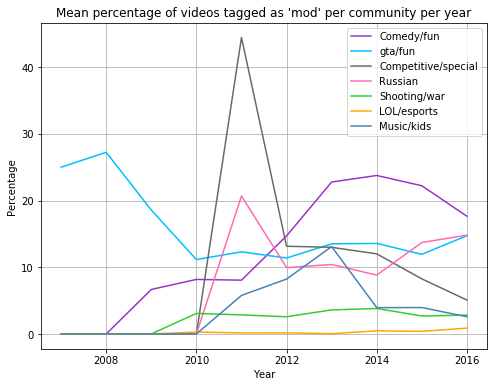

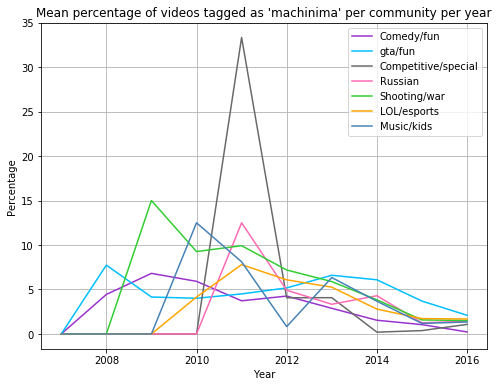

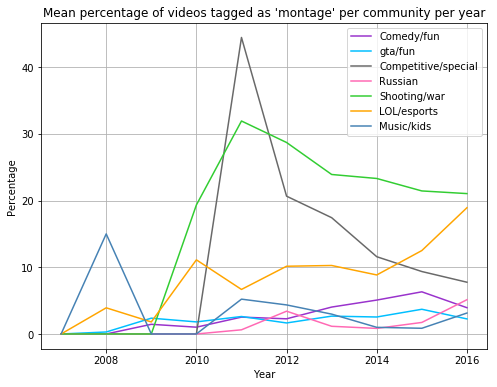

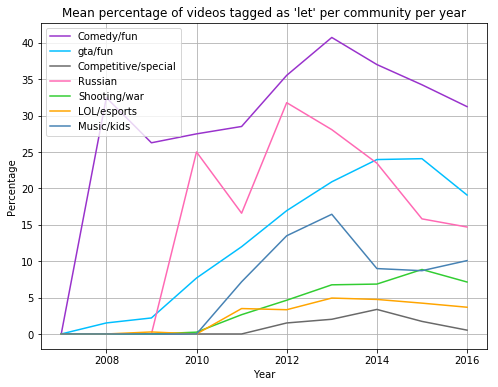

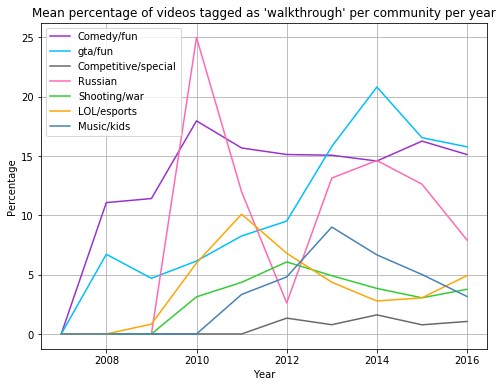

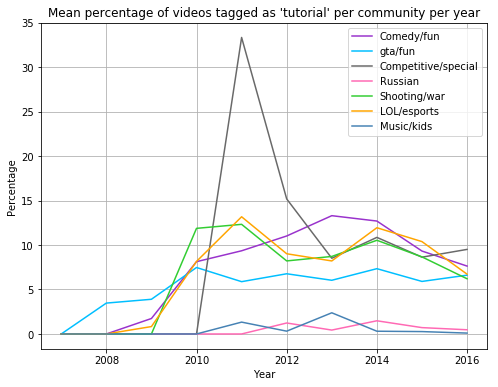

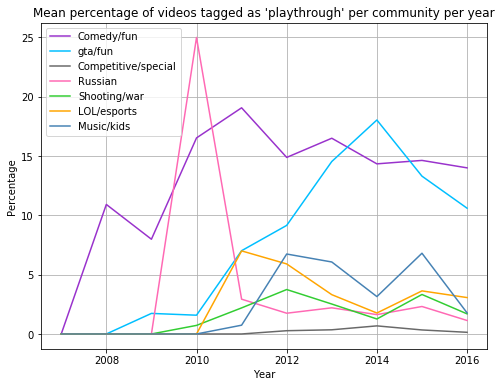

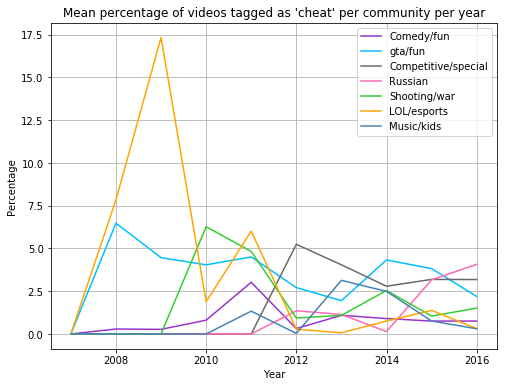

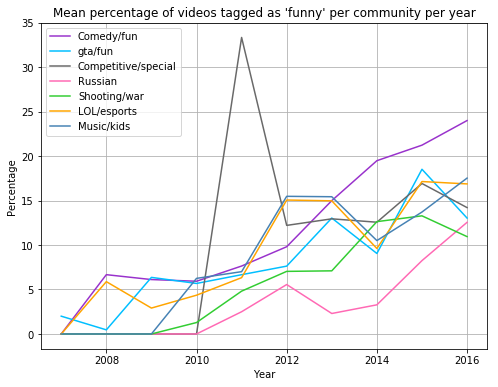

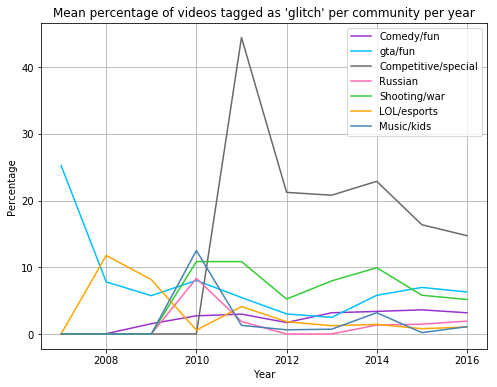

In [700]:
# color_num=['darkorchid', 'deepskyblue', 'limegreen', 'orange','dimgray', 'steelblue', 'hotpink']
color_num={'9':'darkorchid', '22':'deepskyblue','85': 'limegreen', '76':'orange','71':'dimgray', '37':'steelblue',
           '87':'hotpink'}
labels={'darkorchid':'Comedy/fun', 'deepskyblue':'gta/fun', 'dimgray':'Competitive/special', 
        'hotpink':'Russian','limegreen':'Shooting/war','orange':'LOL/esports','steelblue':'Music/kids'}
fanp=['mod', 'machinima', 'montage', 'let', 'walkthrough', 'tutorial', 'playthrough', 'cheat', 'funny', 'glitch']

for n in range(0,len(fanp)):
    lst=[]
    word=fanp[n]
    for year in range(2007,2017):
        dct={}
        df3=df[df['year']==year]
        df3.reset_index(drop=True, inplace=True)
        for i in range(0, len(df3)):
            c= Counter(df3.percentages[i])
            if word in c.keys():
                if c[word]==100:
                    dct={'color':color_num[str(df3.previous_community[i])],'x':year,'y':15}
                    lst.append(dct)
                else:
                    dct={'color':color_num[str(df3.previous_community[i])],'x':year,'y':c[word]}
                    lst.append(dct)
            else:
                dct={'color':color_num[str(df3.previous_community[i])],'x':year,'y':0}
                lst.append(dct)
                
    bar_graph(lst, labels, "Mean percentage of videos tagged as '"+word+"' per community per year")

## Specificity

In [555]:
for year in range (2016, 2017):
    n=0
    df4=dff[dff['year']==year]
    df4=df4.groupby('previous_community').frequency.sum()
    print (year)
    count_allcom=Counter({})
    
    for c, f in df4.items():
        if len(f)!=0:
            n+=1
            f2=f.copy()
            limit=(Series(list(f.values()))).quantile(0.75)
            for word in f.keys():
                if f[word]<limit:
                    del f2[word]
            count_allcom+=f2
            
    print('active communities: '+str(n))
    
    # calculate specificity average per community
    
    for c, f in df4.items():
        specif=0
        word_list=[]
        print('community:'+str(c))
        if len(f)!=0:
            f2=f.copy()
            limit=(Series(list(f.values()))).quantile(0.75)
            for word in f.keys():
                if f[word]>=limit:
                    spec_word=math.log(f[word]/count_allcom[word])
                    specif+=spec_word
                    f2[word]=spec_word
                else:
                    del f2[word]
            specif/=len(f2)
        print(specif)
    break

2016
active communities: 7
community:9
-0.41148086396537176
community:22
-1.400217822392799
community:37
-2.123074591924702
community:71
-1.4621002307736586
community:76
-1.0388747845658644
community:85
-1.2581871235681108
community:87
-0.5631667246245678


## Volatibility

In [427]:
community_num=[9,22,85,76,71,37,87]

for i in range(0, len(community_num)):
    n=0
    df4=dff[dff['year']<=2016]
    df4=df4[df4['previous_community']==community_num[i]]
    df4.reset_index(inplace=True, drop=True)
    count_general=Counter({})
    for per in df4.percentages:
        if len(per)!=0:
            n+=1
            per2=per.copy()
            limit=(Series(list(per.values()))).quantile(0.75)
            for word in per.keys():
                if per[word]<limit:
                    del per2[word]
            count_general+=per2
    
    print('active years of community '+str(community_num[i])+" :"+str(n))
    for word in count_general.keys():
        count_general[word]/=n
    
    for i in range(0, len(df4)):
        volat=0
        word_dict={}
        print(df4.year[i])
        if len(df4.percentages[i])!=0:
            perc_indiv=df4.percentages[i]
            per2=perc_indiv.copy()
            limit=(Series(list(perc_indiv.values()))).quantile(0.75)
            for word in perc_indiv.keys():
                if perc_indiv[word]>=limit:
                    volat_indiv=math.log(perc_indiv[word]/count_general[word])
                    volat+=volat_indiv
                    word_dict.update({word: volat_indiv})
                else:
                    del per2[word]
            volat/=len(per2)
        
        m=len(word_dict)
        if m!=0:
            print(volat/m)
        lim=m-15
        print((Counter(word_dict)).most_common(100))

active years of community 9 :10
2007
0.3186260330870791
[('huepow', 2.302585092994046), ('phantomile', 2.302585092994046), ('klonoa', 2.302585092994046), ('ring', 2.2851499442204974), ('magic', 2.2438875125150726), ('door', 2.2143739937817006), ('playstation', 1.9615088917674692)]
2008
0.003974088082409881
[('alundra', 2.302585092994046), ('priceless', 2.302585092994046), ('guchi', 2.302585092994046), ('archiwum', 2.302585092994046), ('helsinki', 2.302585092994046), ('sunwell', 2.302585092994046), ('poké', 2.302585092994046), ('patrol', 2.302585092994046), ('sandwich', 2.302585092994046), ('shitty', 2.302585092994046), ('ashbringer', 2.302585092994046), ('samwich', 2.302585092994046), ('dziwne', 2.302585092994046), ('worg', 2.302585092994046), ('zipline', 2.302585092994046), ('sagat', 2.302585092994046), ('brutallus', 2.302585092994046), ('whooped', 2.302585092994046), ('estonia', 2.302585092994046), ('guile', 2.302585092994046), ('dazzle', 2.302585092994046), ('improvement', 2.3025850

0.0001561229378294142
[('fusionzgamer', 2.302585092994046), ('thaumatorium', 2.302585092994046), ('pew', 2.302585092994046), ('verlisify', 2.302585092994046), ('skyclash', 2.302585092994046), ('nm', 2.302585092994046), ('contro', 2.302585092994046), ('thunderbird', 2.302585092994046), ('χυδαίο', 2.302585092994046), ('monthly', 2.302585092994046), ('subroza', 2.302585092994046), ('manhattan', 2.302585092994046), ('nightsatfreddysworld', 2.302585092994046), ('manoyek', 2.302585092994046), ('salon', 2.302585092994046), ('ramona', 2.302585092994046), ('undertalepassive', 2.302585092994046), ('walkthroughs', 2.302585092994046), ('arcadian', 2.302585092994046), ('rickyftw', 2.302585092994046), ('gameplaythrough', 2.302585092994046), ('leven', 2.302585092994046), ('gamemodus', 2.302585092994046), ('gliches', 2.302585092994046), ('głoduj', 2.302585092994046), ('recette', 2.302585092994046), ('funtag', 2.302585092994046), ('aramov', 2.302585092994046), ('vexes', 2.302585092994046), ('br', 2.302

0.00036978402278354524
[('celular', 2.302585092994046), ('upgraded', 2.302585092994046), ('serial', 2.302585092994046), ('miller', 2.302585092994046), ('nm', 2.302585092994046), ('customisations', 2.302585092994046), ('ssp', 2.302585092994046), ('pomysły', 2.302585092994046), ('rpgs', 2.302585092994046), ('secondary', 2.302585092994046), ('cassandra', 2.302585092994046), ('kane', 2.302585092994046), ('progen', 2.302585092994046), ('rctw', 2.302585092994046), ('bbd', 2.302585092994046), ('drz', 2.302585092994046), ('jacksepticeye', 2.302585092994046), ('saving', 2.302585092994046), ('equipos', 2.302585092994046), ('racket', 2.302585092994046), ('dupe', 2.302585092994046), ('desk', 2.302585092994046), ('fallen', 2.302585092994046), ('grotti', 2.302585092994046), ('halbblutprinz', 2.302585092994046), ('hansapäevad', 2.302585092994046), ('terrance', 2.302585092994046), ('splash', 2.302585092994046), ('goty', 2.302585092994046), ('pineapple', 2.302585092994046), ('primal', 2.302585092994046

0.0003297408852657995
[('qed', 2.0794415416798357), ('paintjobs', 2.0794415416798357), ('tosfhq', 2.0794415416798357), ('danger', 2.0794415416798357), ('nunchucks', 2.0794415416798357), ('brihd', 2.0794415416798357), ('долг', 2.0794415416798357), ('desk', 2.0794415416798357), ('slick', 2.0794415416798357), ('чернобыля', 2.0794415416798357), ('sturm', 2.0794415416798357), ('stromschlag', 2.0794415416798357), ('splash', 2.0794415416798357), ('fazeup', 2.0794415416798357), ('daddy', 2.0794415416798357), ('dbsr', 2.0794415416798357), ('pile', 2.0794415416798357), ('nadeshiko', 2.0794415416798357), ('primal', 2.0794415416798357), ('keith', 2.0794415416798357), ('naruto', 2.0794415416798357), ('falco', 2.0794415416798357), ('baule', 2.0794415416798357), ('farid', 2.0794415416798357), ('eisendrache', 2.0794415416798357), ('shippuden', 2.0794415416798357), ('bait', 2.0794415416798357), ('wake', 2.0794415416798357), ('mollu', 2.0794415416798357), ('deer', 2.0794415416798357), ('remaster', 2.079

active years of community 71 :6
2011
0.012846093826921787
[('bpass', 1.778610996384549), ('gow', 1.7559108419748575), ('reentry', 1.7559108419748575), ('sam', 1.7464979772323734), ('collateral', 1.746221312350186), ('forza', 1.7455352209007822), ('motorsport', 1.742901371083904), ('bzh', 1.7318271285053815), ('vurvey', 1.7318271285053815), ('bass', 1.7318271285053815), ('verification', 1.7318271285053815), ('dernak', 1.7318271285053815), ('ensemble', 1.7318271285053815), ('expert', 1.7318271285053815), ('enzo', 1.7318271285053815), ('balck', 1.7318271285053815), ('wrestler', 1.7318271285053815), ('dvd', 1.7315510785938046), ('drum', 1.7288398443806163), ('code', 1.7285331464548983), ('guitar', 1.7276495605267077), ('virus', 1.7275543633696415), ('list', 1.7239364981999403), ('preview', 1.7182564883069769), ('modio', 1.7107084947507256), ('jailbreak', 1.7088502953207028), ('subscribe', 1.7038864397372575), ('across', 1.689662876306074), ('gpd', 1.6835658096642458), ('band', 1.6771490925

2009
0.24614146991322042
[('corp', 2.0794415416798357), ('test', 2.061160436531363), ('stunt', 1.9324801728922518), ('stretch', 1.7664572863658368), ('high', 1.7313802588713554), ('jackob', 1.7055753696266145), ('gta', 0.7844369597805415)]
2010
0.04620567016554024
[('запрос', 2.0794415416798357), ('brz', 2.0794415416798357), ('ющенко', 2.0794415416798357), ('янукович', 2.0794415416798357), ('азаров', 2.0794415416798357), ('рейтинг', 2.076606391551329), ('carbon', 2.0709569279711983), ('теги', 2.0684679216471316), ('google', 2.067657741240566), ('поиск', 2.0648450420417674), ('need', 2.0593035649237246), ('drifting', 2.054360430903257), ('build', 2.0369287518940005), ('speed', 2.0137150694802357), ('nfs', 1.9890899032690876), ('drift', 1.9611869509333182), ('music', 1.9454559968081202), ('one', 1.8902553270443778), ('playthrough', 1.6880688138139426), ('youtube', 1.6709387177861474), ('part', 1.559222307118097), ('xbox', 1.4162454577663055), ('review', 1.0385830120268689), ('walkthrough

In [662]:
community_num=[9,22,85,76,71,37,87]

for i in range(0, len(community_num)):
    df4=dff[dff['year']<=2016]
    df4=df4[df4['previous_community']==community_num[i]]
    df4.reset_index(inplace=True, drop=True)
    print(community_num[i])
    df5=df4.groupby('channelId')
    df6=df4.groupby('channelId').frequency.sum()
    volativ_avg=0
    nchannels=0

    for chid, dic in df5:
        value=-1
        nchannels+=1
        volat_ch=0
        count_channel=Counter({})
        for f in dic.frequency:
            f2=f.copy()
            limit=(Series(list(f.values()))).quantile(0.75)
            for word in f.keys():
                if f[word]<limit:
                    del f2[word]
            count_channel+=f2

        #ended count of most used words in all channel history
        timesa=0
        for f in dic.frequency:
            if len(f)!=0:
                volat_y=0
                
                nyears+=1
                f3=f.copy()
                limit=(Series(list(f.values()))).quantile(0.75)
                for word in f.keys():
                    if f[word]>=limit:
                        volat_indiv=math.log(f[word]/count_channel[word])
                        volat_y+=volat_indiv
                        f3[word]=volat_indiv
                        if word=='funny':
                            timesa+=1
                            value+=volat_indiv
                    else:
                        del f3[word]
                        
                volat_y/=len(f3)
                volat_ch+=volat_y
                
        if value!=0:
            value/=timesa
            print(value)
        else:
            print(value)
                
    break
#         volat_ch/=nyears

# #         if volat_ch==0:
# #             nchannels-=1
#         print(str(chid)+" "+str(volat_ch))
#         volativ_avg+=volat_ch

#     volativ_avg/=nchannels

#     print("")
#     print('average: '+str(volativ_avg))

9
-2.6133347721788676
-1.9149348609614303
-1.4227794356981793
-1.0


ZeroDivisionError: division by zero

In [590]:
df4=dff[dff['year']<=2016]

In [592]:
df4=df4[df4['previous_community']==community_num[1]]

In [593]:
df4

,channelId,year,previous_community,counts,frequency
1106,UC4luxhcWplahwiCWAo1787g,2007,22,"Counter({'vice': 1, 'dream': 1, 'grand': 1, 'r...","{'multiplayer': 1, 'city': 1, 'joshua': 1, 'ga..."
1107,UCMhZyW4q91QAzBxhj8IX5vA,2007,22,"Counter({'grand': 50, 'gta': 50, 'auto': 50, '...","{'jump': 12, 'ryder': 1, 'city': 29, 'hog': 1,..."
1108,UCSDQ-F2tOTA5G457oCQNw-w,2007,22,"Counter({'game': 101, 'gang': 91, 'warrior': 9...","{'army': 8, 'city': 7, 'chase': 1, 'accident':..."
1109,UCuWcjpKbIDAbZfHoru1toFg,2007,22,"Counter({'official': 48, 'trailer': 40, 'game'...","{'multiplayer': 1, 'vancouver': 7, 'cutscenes'..."
1110,UC1sBOLUR6x_sTfaN-cvv4Og,2008,22,"Counter({'gta': 7, 'grand': 5, 'auto': 5, 'the...","{'jump': 2, 'german': 1, 'editor': 1, 'torch':..."
1111,UC4luxhcWplahwiCWAo1787g,2008,22,"Counter({'vice': 3, 'grand': 3, 'rockstar': 3,...","{'tiny': 1, 'city': 3, 'playstation': 1, 'porn..."
1112,UC9T6a9Mp8MR4PcJFdJCeMyg,2008,22,"Counter({'entertanment': 1, 'grand': 1, 'music...","{'jump': 1, 'offspring': 1, 'gta': 1, 'enterta..."
1113,UCCF19iR63Bdy7mPak1El8vw,2008,22,"Counter({'bluedagger': 1, 'grand': 1, 'auto': ...","{'revenge': 1, 'cristmass': 1, 'dagger': 1, 'n..."
1114,UCEX-6l9RNkbY_JHFqprPmTg,2008,22,"Counter({'gamescathedral': 3, 'world': 3, 'sex...","{'german': 2, 'edition': 1, 'gameplay': 2, 'mo..."
1115,UCIPDwnAdgsqswIOEEbU2MIg,2008,22,"Counter({'guitar': 4, 'expert': 4, 'sightread'...","{'expert': 4, 'rock': 3, 'read': 1, 'monsoon':..."


In [670]:
df4=dff[dff['year']==year]
# df4=df4.groupby('previous_community').frequency.sum()

In [669]:
for c, f in df4.items():
    print(c)
    print(f.most_common(10))

9
[('game', 13472), ('play', 13105), ('gameplay', 12121), ('let', 11489), ('minecraft', 9018), ('funny', 6516), ('gaming', 6412), ('video', 5661), ('playthrough', 5570), ('walkthrough', 5085)]
22
[('gameplay', 5019), ('game', 3704), ('play', 2453), ('video', 2417), ('gta', 2319), ('let', 2122), ('gaming', 1998), ('xbox', 1939), ('walkthrough', 1849), ('one', 1696)]
37
[('fnaf', 963), ('freddy', 913), ('night', 873), ('five', 838), ('sfm', 744), ('animation', 732), ('gameplay', 606), ('play', 589), ('let', 555), ('sister', 532)]
71
[('black', 3776), ('ops', 3710), ('call', 2990), ('duty', 2984), ('cod', 2815), ('gameplay', 2370), ('zombie', 1471), ('dlc', 1409), ('warfare', 1253), ('new', 1167)]
76
[('league', 7920), ('legend', 7850), ('lol', 6143), ('gameplay', 5581), ('game', 4045), ('play', 3016), ('season', 2904), ('guide', 2705), ('best', 2602), ('jungle', 2538)]
85
[('call', 4875), ('duty', 4864), ('black', 4774), ('ops', 4712), ('gameplay', 4062), ('cod', 3893), ('warfare', 2247)

In [679]:
for year in range (2011,2016):
    df4=df[df['year']==year]
    print(year)
    for p in df4.percentages:
#         print(p)
        print(p.most_common(10))

2011
[('game', 41.37098721600728), ('minecraft', 34.36320875396026), ('play', 32.78362900316032), ('let', 28.503117653008992), ('video', 27.760868293917746), ('gameplay', 26.913482419306202), ('commentary', 26.214662075580172), ('gaming', 19.268909110787586), ('playthrough', 19.069656640090763), ('walkthrough', 15.683150819676564)]
[('game', 39.57492695751302), ('gta', 38.072687817487704), ('auto', 28.038298102298473), ('gameplay', 27.465619292524682), ('theft', 27.40529460272778), ('grand', 27.070032964933215), ('city', 25.961532207817246), ('video', 25.568549979944237), ('andreas', 18.193887992270753), ('xbox', 17.405123714031514)]
[('call', 59.50108430584377), ('duty', 59.218412967594055), ('cod', 52.71830115303641), ('modern', 45.321789460665656), ('warfare', 44.74230455568373), ('gameplay', 43.687839324316094), ('ops', 42.583523553622626), ('black', 42.33077274372989), ('xbox', 32.43617725507424), ('montage', 31.92279962190904)]
[('game', 39.03222623051129), ('gameplay', 30.115476

In [675]:
df4

,year,previous_community,counts,percentages
8,2015,9,"Counter({'game': 56.61458784289153, 'minecraft...","{'fusionzgamer': 0.024242424242424242, 'steamg..."
19,2015,22,"Counter({'game': 59.670533919879745, 'video': ...","{'dynasty': 0.021699182602824833, 'pew': 1.119..."
28,2015,85,"Counter({'duty': 58.17216508357609, 'call': 58...","{'bingo': 0.011911852293031567, 'granata': 0.0..."
38,2015,76,"Counter({'league': 62.05092862000633, 'legend'...","{'instructor': 0.010735373054213633, 'preto': ..."
45,2015,71,"Counter({'call': 53.92082651474781, 'duty': 53...","{'hbar': 0.04102143369910778, 'garvey': 0.0742..."
55,2015,37,"Counter({'game': 49.0318205045636, 'video': 38...","{'multiplayer': 1.7109974465025948, 'mining': ..."
64,2015,87,"Counter({'game': 48.84925061741121, 'video': 4...","{'экспериментал': 0.1678321678321678, 'доход':..."
